## Dataset: Heart Disease 
#### 目標: 猜測是否有心臟疾病
#### 特徵清單: 
10. age: continuous
11. sex: categorical, 2 values {0: female, 1: male}
12. cp (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
13. restbp (resting blood pressure on admission to h ospital): continuous (mmHg)
14. chol (serum cholesterol level): continuous (mg/dl)
15. fbs (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
16. restecg (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
17. thalach (maximum heart rate achieved): continuous
18. exang (exercise induced angina): categorical, 2 values {0: no, 1: yes}
19. oldpeak (ST depression induced by exercise relative to rest): continuous
20. slope (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
21. ca (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
22. thal: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
23. num (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}

In [133]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

#### 簡單語法練習 (讀檔、畫圖...)

In [134]:
# J: 以後讀這種dat檔案時要注意一下讀法
df = pd.read_csv('cleveland.dat', header=None, sep=', ', engine='python')

# columns setting
df.columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg",
              "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

# 這邊的意思是說把df['num']的2 ~ 4都設成1
for i in range(2, 5):
    df['num'] = df['num'].replace(i, 1)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null float64
cp         303 non-null float64
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null float64
restecg    303 non-null float64
thalach    303 non-null float64
exang      303 non-null float64
oldpeak    303 non-null float64
slope      303 non-null float64
ca         303 non-null object
thal       303 non-null object
num        303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [136]:
df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


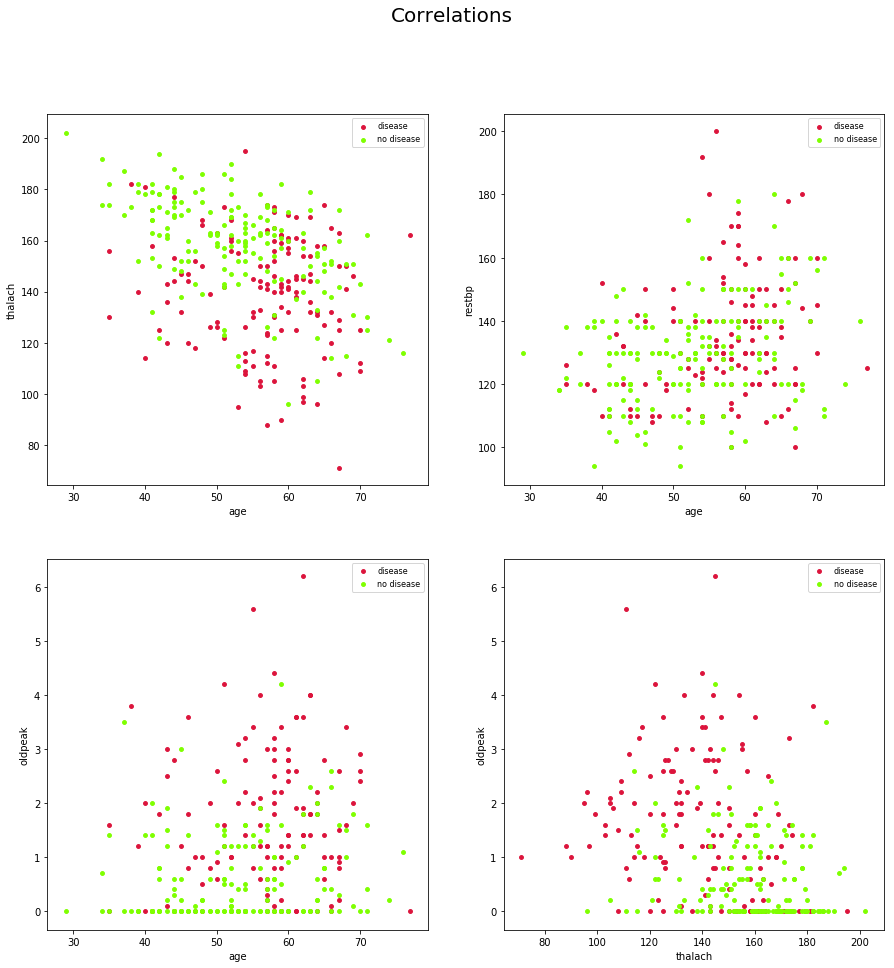

In [137]:
# 畫圖練習
fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(15, 15) )
plt.suptitle("Correlations", fontsize=20)

# alpha設透明度，s設點的大小
axes[0,0].scatter(df[ df.num==1 ].age, df[ df.num==1 ].thalach, color=["crimson"], s=15, alpha=1, label="disease") 
axes[0,0].scatter(df[ df.num==0 ].age, df[ df.num==0 ].thalach, color=["chartreuse"], s=15, label="no disease")
axes[0,0].set_xlabel("age")
axes[0,0].set_ylabel("thalach")
# prop是設定右上角那個正方形label說明的大小，loc是設定正方形出現在哪個位置
axes[0,0].legend(prop={'size': 8}, loc="best") 

axes[0,1].scatter(df[ df.num==1 ].age, df[ df.num==1 ].restbp, color=["crimson"], s=15, label="disease")
axes[0,1].scatter(df[ df.num==0 ].age, df[ df.num==0 ].restbp, color=["chartreuse"], s=15, label="no disease")
axes[0,1].set_xlabel("age")
axes[0,1].set_ylabel("restbp")
axes[0,1].legend(prop={'size': 8}, loc="best") # prop是設定右上角那個正方形label說明的大小，loc是設定正方形出現在哪個位置

axes[1,0].scatter(df[ df.num==1 ].age, df[ df.num==1 ].oldpeak, color=["crimson"], s=15, label="disease")
axes[1,0].scatter(df[ df.num==0 ].age, df[ df.num==0 ].oldpeak, color=["chartreuse"], s=15, label="no disease")
axes[1,0].set_xlabel("age")
axes[1,0].set_ylabel("oldpeak")
axes[1,0].legend(prop={'size': 8}, loc="best") 

axes[1,1].scatter(df[ df.num==1 ].thalach, df[ df.num==1 ].oldpeak, color=["crimson"], s=15, label="disease")
axes[1,1].scatter(df[ df.num==0 ].thalach, df[ df.num==0 ].oldpeak, color=["chartreuse"], s=15, label="no disease")
axes[1,1].set_xlabel("thalach")
axes[1,1].set_ylabel("oldpeak")
axes[1,1].legend(prop={'size': 8}, loc="best") 

plt.show()

### Data Preprocessing練習 (處理異常值, missing vale)

In [138]:
# 觀察每個欄位的型態(發現thal, ca有異常值)
df.dtypes # j: 用df.info()應當也可以

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
num          int64
dtype: object

In [139]:
pd.set_option('display.max_columns', None) #显示所有列
pd.set_option('display.max_rows', None) #显示所有行
# 另一種設定法
# pd.set_option('display.max_columns', 15)
# pd.set_option('display.max_rows', 500)

print(df)

      age  sex   cp  restbp   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0   145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0   160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    37.0  1.0  3.0   130.0  250.0  0.0      0.0    187.0    0.0      3.5   
3    41.0  0.0  2.0   130.0  204.0  0.0      2.0    172.0    0.0      1.4   
4    56.0  1.0  2.0   120.0  236.0  0.0      0.0    178.0    0.0      0.8   
5    62.0  0.0  4.0   140.0  268.0  0.0      2.0    160.0    0.0      3.6   
6    57.0  0.0  4.0   120.0  354.0  0.0      0.0    163.0    1.0      0.6   
7    63.0  1.0  4.0   130.0  254.0  0.0      2.0    147.0    0.0      1.4   
8    53.0  1.0  4.0   140.0  203.0  1.0      2.0    155.0    1.0      3.1   
9    57.0  1.0  4.0   140.0  192.0  0.0      0.0    148.0    0.0      0.4   
10   56.0  0.0  2.0   140.0  294.0  0.0      2.0    153.0    0.0      1.3   
11   56.0  1.0  3.0   130.0  256.0  1.0      2.0    142.0    1.0      0.6   

In [140]:
index = 0
for i in df['ca']:
    if i != '0.0' and i != '1.0' and i != '2.0' and i != '3.0':
        print(i, "index:", index)
    index += 1
    
# J:課堂上的寫法，感覺比較沒效率
# for i in range(len(df['ca'].tolist())):
#     val = df['ca'][i]
#     if (val != '0.0') and (val != '1.0') and (val != '2.0') and (val != '3.0'):
#         print(val, "index:", i)

? index: 154
? index: 177
? index: 261
? index: 272


In [141]:
index = 0
for i in df['thal']:
    if i != '3.0' and i != '6.0' and i != '7.0':
        print(i, "index:", index)
    index += 1

# J:課堂上的寫法，感覺比較沒效率
# for i in range(len(df['thal'].tolist())):
#     val = df['thal'][i]
#     if (val != '3.0') and (val != '6.0') and (val != '7.0'):
#         print(val," index:", i)

? index: 81
? index: 244


In [142]:
# index locate, 詳情請見hackmd裡的課堂筆記 [Python] pandas （ix & iloc &loc） 的区别
df.iloc[154:273]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
154,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
155,54.0,0.0,2.0,132.0,288.0,1.0,2.0,159.0,1.0,0.0,1.0,1.0,3.0,0
156,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1
157,45.0,0.0,2.0,112.0,160.0,0.0,0.0,138.0,0.0,0.0,2.0,0.0,3.0,0
158,53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0,0
159,59.0,0.0,4.0,174.0,249.0,0.0,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1
160,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0,0
161,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,1
162,57.0,1.0,4.0,152.0,274.0,0.0,0.0,88.0,1.0,1.2,2.0,1.0,7.0,1
163,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0


In [143]:
df = df.replace('?', np.nan)
df.iloc[154:273]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
154,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
155,54.0,0.0,2.0,132.0,288.0,1.0,2.0,159.0,1.0,0.0,1.0,1.0,3.0,0
156,35.0,1.0,4.0,126.0,282.0,0.0,2.0,156.0,1.0,0.0,1.0,0.0,7.0,1
157,45.0,0.0,2.0,112.0,160.0,0.0,0.0,138.0,0.0,0.0,2.0,0.0,3.0,0
158,53.0,1.0,4.0,142.0,226.0,0.0,2.0,111.0,1.0,0.0,1.0,0.0,7.0,0
159,59.0,0.0,4.0,174.0,249.0,0.0,0.0,143.0,1.0,0.0,2.0,0.0,3.0,1
160,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0,0
161,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,1
162,57.0,1.0,4.0,152.0,274.0,0.0,0.0,88.0,1.0,1.2,2.0,1.0,7.0,1
163,52.0,1.0,4.0,108.0,233.0,1.0,0.0,147.0,0.0,0.1,1.0,3.0,7.0,0


In [144]:
#針對num欄位觀察其他欄位數量 (J:因為num是output的lable，用此觀察較好)
df.groupby('num').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0,164,164,164,164,164,164,164,164,164,164,164,161,163
1,139,139,139,139,139,139,139,139,139,139,139,138,138


In [145]:
#針對 ca欄位檢查缺失值 (J:NaN跟null似乎在pandas裡是一樣的?)
df[df['ca'].isnull()]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
154,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
177,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
261,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
272,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [146]:
# drop missing values (方法一)
df_drop = df.dropna()
print('before drop, data size: ',len(df))
print('after drop, data size: ',len(df_drop))

before drop, data size:  303
after drop, data size:  297


In [147]:
# 方法二 補值
'''
(1)用mean值代替
(2)用median代替
(3)用most_frequent代替 (mode)
'''

# from sklearn.preprocessing import Imputer # 補missing value用的
from sklearn.impute import SimpleImputer # J: 上面那行是舊版的宣告法，現在新版用這樣比較好

# imr = Imputer(missing_values='NaN', strategy='most_frequent', axis=0) #J:舊的宣告法，已淘汰
imr = SimpleImputer(missing_values=np.nan, strategy='median') #strategy可以替換成mean或是median
imr = imr.fit(df.values)

imputed_data = pd.DataFrame( imr.transform(df.values) )
imputed_data.columns = df.columns

imputed_data

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
5,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,1.0
6,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
7,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,1.0
8,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0
9,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0.0


In [148]:
#針對num欄位觀察其他欄位數量
imputed_data.groupby('num').count()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
num,,,,,,,,,,,,,
0.0,164,164,164,164,164,164,164,164,164,164,164,164,164
1.0,139,139,139,139,139,139,139,139,139,139,139,139,139


In [149]:
# 類別型資料做 one-hot encoding 
# J: 先將類別型資料全部轉換為string型態 (為了 get_dummies用)
for cat_feature in ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']:
    imputed_data[cat_feature] = imputed_data[cat_feature].astype(str)
    # df_drop[cat_feature] = df_drop[cat_feature].astype(str) # J: 多出來的這行應該是讓你下面練習用的
    
# one-hot encoding
df_preprocessed = pd.get_dummies(imputed_data)
# df_preprocessed = pd.get_dummies(df_drop) # J:應該是配合上面練習用的

# print(df_preprocessed) J: 這邊print出來的結果太難看了，我直接輸出成csv檔案
df_preprocessed.to_csv('df_preprocessed.csv')

In [150]:
# J: 觀察一下資料處理完後的型態變化
imputed_data.info()
print()
df_drop.info()
print()
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age        303 non-null float64
sex        303 non-null object
cp         303 non-null object
restbp     303 non-null float64
chol       303 non-null float64
fbs        303 non-null object
restecg    303 non-null object
thalach    303 non-null float64
exang      303 non-null object
oldpeak    303 non-null float64
slope      303 non-null object
ca         303 non-null object
thal       303 non-null object
num        303 non-null float64
dtypes: float64(6), object(8)
memory usage: 33.2+ KB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 302
Data columns (total 14 columns):
age        297 non-null float64
sex        297 non-null float64
cp         297 non-null float64
restbp     297 non-null float64
chol       297 non-null float64
fbs        297 non-null float64
restecg    297 non-null float64
thalach    297 non-null float64
exang      297 non-null float64
oldpeak 

### Data Preprocessing練習2 (資料集切割)

In [151]:
df_preprocessed

,age,restbp,chol,thalach,oldpeak,num,sex_0.0,sex_1.0,cp_1.0,cp_2.0,cp_3.0,cp_4.0,fbs_0.0,fbs_1.0,restecg_0.0,restecg_1.0,restecg_2.0,exang_0.0,exang_1.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,150.0,2.3,0.0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,108.0,1.5,1.0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0
2,37.0,130.0,250.0,187.0,3.5,0.0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0
3,41.0,130.0,204.0,172.0,1.4,0.0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0
4,56.0,120.0,236.0,178.0,0.8,0.0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0
5,62.0,140.0,268.0,160.0,3.6,1.0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0
6,57.0,120.0,354.0,163.0,0.6,0.0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0
7,63.0,130.0,254.0,147.0,1.4,1.0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1
8,53.0,140.0,203.0,155.0,3.1,1.0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1
9,57.0,140.0,192.0,148.0,0.4,0.0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0


In [152]:
from sklearn.model_selection import train_test_split

X = df_preprocessed.drop('num', axis=1).values # 將DataFrame轉成numpy.ndarray
Y = df_preprocessed['num'].values # Y就是所有的caterory label，轉成numpy.ndarray

# train_test_split功能是從樣本中隨機的按比例選取train_data和test_data，形式為：
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [153]:
# np.set_printoptions(threshold=np.nan) # J: 為了完整print出ndarray用，但會變得很醜...
print('training data size:', len(X_train))
print(X_train)
print('testing data size:', len(X_test))
print(X_test)

print('training data\'s Label:', len(y_train))
print(y_train)
print('testing data\'s Label:', len(y_test))
print(y_test)


training data size: 242
[[ 48. 130. 245. ...   1.   0.   0.]
 [ 57. 132. 207. ...   0.   0.   1.]
 [ 59. 170. 326. ...   0.   0.   1.]
 ...
 [ 54. 110. 239. ...   0.   0.   1.]
 [ 65. 120. 177. ...   0.   0.   1.]
 [ 66. 160. 246. ...   0.   1.   0.]]
testing data size: 61
[[ 67. 120. 237. ...   1.   0.   0.]
 [ 48. 124. 255. ...   1.   0.   0.]
 [ 52. 125. 212. ...   0.   0.   1.]
 ...
 [ 40. 110. 167. ...   0.   0.   1.]
 [ 35. 138. 183. ...   1.   0.   0.]
 [ 59. 110. 239. ...   0.   0.   1.]]
training data's Label: 242
[0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0.

In [154]:
#get features list # J:這邊練習nparray轉成list 後面畫圖時才會用到
features = np.array(df_preprocessed.columns)
print(type(features))
print(features)

features = np.delete(features, np.where(features=='num')[0][0]) #J: 不懂加上[0][0]的理由
print(type(features))
print(features)

features = features.tolist()
print(type(features))
print(features)

<class 'numpy.ndarray'>
['age' 'restbp' 'chol' 'thalach' 'oldpeak' 'num' 'sex_0.0' 'sex_1.0'
 'cp_1.0' 'cp_2.0' 'cp_3.0' 'cp_4.0' 'fbs_0.0' 'fbs_1.0' 'restecg_0.0'
 'restecg_1.0' 'restecg_2.0' 'exang_0.0' 'exang_1.0' 'slope_1.0'
 'slope_2.0' 'slope_3.0' 'ca_0.0' 'ca_1.0' 'ca_2.0' 'ca_3.0' 'thal_3.0'
 'thal_6.0' 'thal_7.0']
<class 'numpy.ndarray'>
['age' 'restbp' 'chol' 'thalach' 'oldpeak' 'sex_0.0' 'sex_1.0' 'cp_1.0'
 'cp_2.0' 'cp_3.0' 'cp_4.0' 'fbs_0.0' 'fbs_1.0' 'restecg_0.0'
 'restecg_1.0' 'restecg_2.0' 'exang_0.0' 'exang_1.0' 'slope_1.0'
 'slope_2.0' 'slope_3.0' 'ca_0.0' 'ca_1.0' 'ca_2.0' 'ca_3.0' 'thal_3.0'
 'thal_6.0' 'thal_7.0']
<class 'list'>
['age', 'restbp', 'chol', 'thalach', 'oldpeak', 'sex_0.0', 'sex_1.0', 'cp_1.0', 'cp_2.0', 'cp_3.0', 'cp_4.0', 'fbs_0.0', 'fbs_1.0', 'restecg_0.0', 'restecg_1.0', 'restecg_2.0', 'exang_0.0', 'exang_1.0', 'slope_1.0', 'slope_2.0', 'slope_3.0', 'ca_0.0', 'ca_1.0', 'ca_2.0', 'ca_3.0', 'thal_3.0', 'thal_6.0', 'thal_7.0']


### Data Preprocessing練習3 (standardization)

In [155]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### Classification練習1 Decision Tree

In [156]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# 訓練決策樹分類器
tree = DecisionTreeClassifier(criterion='gini', max_depth=3) # J:改改看max_depth來看accuracy變化
tree.fit(X_train_std, y_train)

# predict
y_pred_decision = tree.predict(X_test_std)
# print(y_pred_decision) #J: 這邊會預測出很多個predict label

y_predprob_decision = tree.predict_proba(X_test_std)
# print(y_predprob_decision) #J: 參考http://sofasofa.io/forum_main_post.php?postid=1000600

y_predprob_po_decision = y_predprob_decision[:, 1]
# print(y_predprob_po_decision) #J: 呈上，這邊的意思就是說所有資料為positive的機率

# 這邊我們來看看模型準確度
# print('Decision tree testing result:',y_pred_decision)
# print('Decision tree testing prob:', y_predprob_po_decision)
print('Misclassified samples: %d' % (y_test != y_pred_decision).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_decision))

Misclassified samples: 8
Accuracy: 0.8689


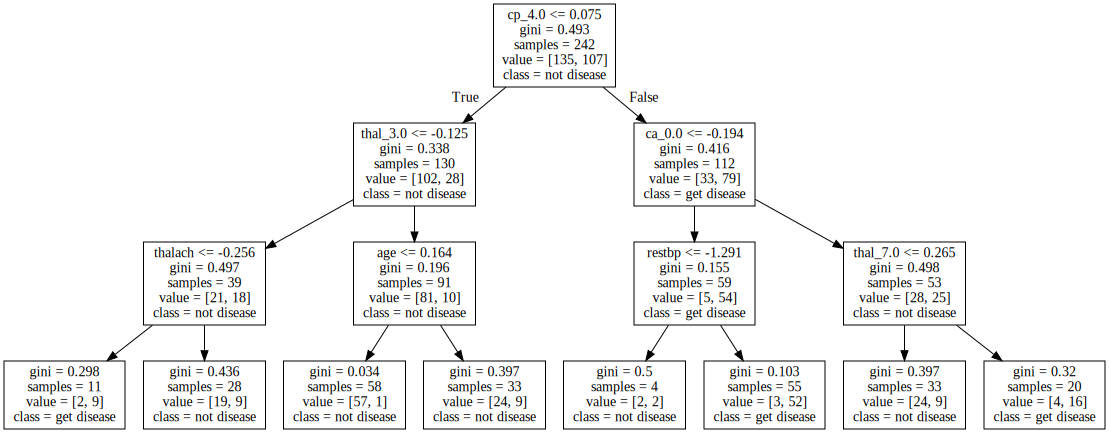

In [157]:
# 把決策樹畫出來
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(tree, out_file=None, feature_names=features, class_names=['not disease', 'get disease'])
# print(dot_data) #J: 這是用DLR的方式來遞迴做出決策樹的
graph = graphviz.Source(dot_data, format='png') 
graph

### Classification練習2 Linear SVM

In [158]:
from sklearn.svm import SVC

# train model
svm_linear = SVC(kernel='linear', random_state=0, probability=True) #J:probability=False的話下面就不能呼叫.predict_proba了
svm_linear.fit(X_train_std, y_train) # 餵入training data，並訓練出分類器'svm_linear'

#predict
y_pred_linear = svm_linear.predict(X_test_std) #testing data餵入分類器'svm_linear'，得到每筆的預測結果'y_pred'
y_predprob_linear = svm_linear.predict_proba(X_test_std)
y_predprob_po_linear =  y_predprob_linear[:,1]
print('Linear SVM testing result:',y_pred_linear)
print('Linear SVM testing prob:', y_predprob_po_linear)
print('Misclassified samples: %d' % (y_test != y_pred_linear).sum()) 
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_linear)) #評估正確性

Linear SVM testing result: [0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
Linear SVM testing prob: [0.33643232 0.20299603 0.74619323 0.22145587 0.57215262 0.4811319
 0.05226558 0.94381689 0.43418857 0.5        0.95356092 0.0526699
 0.12062667 0.22884345 0.26466975 0.04397174 0.19402195 0.90560429
 0.046068   0.85749579 0.96359181 0.30180971 0.54195588 0.09826657
 0.04780049 0.80578119 0.35617279 0.90339885 0.05757535 0.38224424
 0.59408883 0.94941852 0.94031225 0.86965441 0.09159172 0.05412484
 0.02743192 0.04128715 0.11733786 0.63384422 0.78365069 0.03196725
 0.21407066 0.09219683 0.89378468 0.74370653 0.98091655 0.308097
 0.43005988 0.87834566 0.13945887 0.18411004 0.17928492 0.2904379
 0.05900236 0.85808267 0.90947288 0.54416563 0.84880056 0.19153184
 0.91703523]
Misclassified samples: 5
Accuracy: 0.9180


### Classification練習3 RBF SVM

In [159]:
from sklearn.svm import SVC #J: 上面import過了

#train rbf model
svm_rbf = SVC(kernel='rbf', C=2, random_state=0, probability=True) 
svm_rbf.fit(X_train_std, y_train)

#predict
y_pred_rbf = svm_rbf.predict(X_test_std)
y_predprob_rbf = svm_rbf.predict_proba(X_test_std)
y_predprob_po_rbf =  y_predprob_rbf[:,1]
print('RBF SVM testing result:',y_pred_rbf)
print('RBF SVM testing prob:',y_predprob_po_rbf)
print('Misclassified samples: %d' % (y_test != y_pred_rbf).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_rbf))

RBF SVM testing result: [0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
RBF SVM testing prob: [0.36526356 0.30247409 0.79190158 0.21436885 0.70725494 0.58801869
 0.05879919 0.86000055 0.58087718 0.73680522 0.78426519 0.04972589
 0.09965566 0.20907662 0.18338525 0.0828613  0.21315719 0.8313637
 0.05072921 0.86073846 0.96082035 0.5        0.69696785 0.07436616
 0.05837508 0.78907235 0.24879851 0.90002252 0.06720932 0.5128605
 0.43816168 0.91003455 0.82118914 0.74839674 0.10279977 0.0522691
 0.10017534 0.0773205  0.11468053 0.52697725 0.44338094 0.06821409
 0.17406376 0.14367324 0.88110914 0.89391232 0.72359722 0.40677135
 0.51066198 0.9489134  0.1073099  0.08158992 0.13131421 0.46960354
 0.06567461 0.83747845 0.91163484 0.88121789 0.79476925 0.14080668
 0.93547562]
Misclassified samples: 6
Accuracy: 0.9016


In [160]:
# 改改看使用未標準化的data 在rbf svm上
svm_rbf = SVC(kernel='rbf', C=2, random_state=0, probability=True)
svm_rbf.fit(X_train, y_train)

y_pred_unstd = svm_rbf.predict(X_test)
y_predprob_unstd = svm_rbf.predict_proba(X_test)
y_predprob_po_unstd =  y_predprob_unstd[:,1]
print('RBF SVM testing result:',y_pred_unstd)
print('RBF SVM testing prob:',y_predprob_po_unstd)
print('Misclassified samples: %d' % (y_test != y_pred_unstd).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_unstd))

RBF SVM testing result: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
RBF SVM testing prob: [0.44173554 0.42135616 0.43331127 0.44155555 0.39503241 0.51849677
 0.42595959 0.44170404 0.38099326 0.43558357 0.44168582 0.44173468
 0.37215534 0.43683652 0.38787781 0.44149458 0.44140627 0.44183024
 0.43510657 0.46748517 0.49358669 0.44173554 0.42810962 0.4417808
 0.43401257 0.44502548 0.42660629 0.44173554 0.44470629 0.44883582
 0.44128122 0.44173751 0.44174144 0.42521618 0.44191973 0.40144408
 0.44296172 0.44187094 0.4412978  0.43023753 0.44164554 0.45391433
 0.44171879 0.44173678 0.49035979 0.44128014 0.44173554 0.44069688
 0.44129681 0.52898651 0.44361584 0.435486   0.44173265 0.50984326
 0.40386929 0.44164231 0.44409437 0.44200542 0.44176301 0.44112877
 0.43932016]
Misclassified samples: 28
Accuracy: 0.5410


C:\Users\shawn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


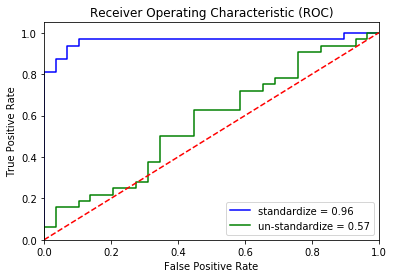

In [161]:
# 來畫ROC曲線
from sklearn.metrics import roc_curve, auc

# 資料標準化後的 svm model
fpr, tpr, thres = roc_curve(y_test, y_predprob_po_rbf)
roc_auc = auc(fpr, tpr)

# 資料標準化前的 svm model
fpr_unstd, tpr_unstd, thres_unstd = roc_curve(y_test, y_predprob_po_unstd)
roc_auc_unstd = auc(fpr_unstd, tpr_unstd)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, 'b', label='standardize = %0.2f'% roc_auc)
plt.plot(fpr_unstd, tpr_unstd, 'g', label='un-standardize = %0.2f'% roc_auc_unstd)
plt.legend(loc='best')
plt.plot([0, 1], color='r', linestyle='--')  
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.show()

### Cross Validation

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 一般的linear SVM
svm_linear = SVC(kernel='linear', C=2) 
svm_linear.fit(X_train_std, y_train) 

# predict
y_pred = svm_linear.predict(X_test_std) 
print('testing result:', y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

# 使用cross validate的linear svm
print('==============================cross validation===========================================')
from sklearn.model_selection import cross_val_score

X_std = np.concatenate((X_train_std, X_test_std), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

svm_linear = SVC(kernel='linear', C=2)
#cv:切割為cv份
scores = cross_val_score(svm_linear, X_std, y, cv=3)
print("Cross Validation every accuracy: ", scores)
print("(Cross Validation)Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

testing result: [0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
Misclassified samples: 5
Accuracy: 0.9180
==============================cross validation===========================================
Cross Validation every accuracy:  [0.81372549 0.84158416 0.89      ]
(Cross Validation)Accuracy: 0.8484 (+/- 0.0630)


### Exersice1: 10 fold cross validation on decision tree

In [163]:
from sklearn.tree import DecisionTreeClassifier

#train tree model
tree = DecisionTreeClassifier(criterion='gini', max_depth=3)
tree.fit(X_train_std, y_train)

#predict
y_pred = tree.predict(X_test_std)
print('Decision tree testing result:', y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

print('\n==============================cross validation===========================================')
from sklearn.model_selection import cross_val_score

X_std = np.concatenate((X_train_std, X_test_std), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# decision tree model
tree_cross = DecisionTreeClassifier(criterion='gini', max_depth=3)
#cv:切割為cv份
scores = cross_val_score(tree_cross, X_std, y, cv=3)
print("Cross Validation every accuracy: ", scores)
print("(Cross Validation)Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

Decision tree testing result: [0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
Misclassified samples: 8
Accuracy: 0.8689

==============================cross validation===========================================
Cross Validation every accuracy:  [0.7254902 0.8019802 0.82     ]
(Cross Validation)Accuracy: 0.7825 (+/- 0.0819)


### Classification練習4 KNN

### KNN
sklearn的KNN參數參考:

n_neighbors : Number of neighbors to use by default for k_neighbors queries.

p : Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

n_jobs : The number of parallel jobs to run for neighbors search

In [164]:
from sklearn.neighbors import KNeighborsClassifier

# 改改看 n_neighbors
knn = KNeighborsClassifier(n_neighbors=7, p=2)
knn.fit(X_train_std, y_train)

y_pred_knn = knn.predict(X_test_std)
y_predprob_knn = knn.predict_proba(X_test_std)
y_predprob_po_knn = y_predprob_knn[:, 1]
print("Misclassified sample: %d" % (y_test != y_pred_knn).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_knn))

Misclassified sample: 10
Accuracy: 0.8361


### Classification練習5 RandomForest

In [165]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini', n_estimators=19, random_state=1)
forest.fit(X_train_std,y_train)

y_pred_forest = forest.predict(X_test_std)
y_predprob_forest = forest.predict_proba(X_test_std)
y_predprob_po_forest = y_predprob_forest[:, 1] 
print("Misclassified sample: %d" % (y_test != y_pred_forest).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred_forest))

Misclassified sample: 5
Accuracy: 0.9180


### Feature Selection練習  (重要!! 多看幾遍)

#### linear svm係數可作為feature重要性的指標!

In [166]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#train svmliner model
svm_linear = SVC(kernel='linear', C=2, random_state=0) 
svm_linear.fit(X_train_std, y_train) # 餵入training data，並訓練出分類器'svm_linear'

#predict
y_pred = svm_linear.predict(X_test_std) #testing data餵入分類器'svm_linear'，得到每筆的預測結果'y_pred'
print('Linear SVM testing result:', y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred)) #評估正確性


# 準備要做cross validate, 先把資料合併
X_std = np.concatenate((X_train_std, X_test_std), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

# cross validation
svm_cross = SVC(kernel='linear', C=2) 
scores = cross_val_score(svm_cross, X_std, y, cv=4)
print("Cross Validation result scores",scores)
print("(Cross Validation) Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))

Linear SVM testing result: [0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
Misclassified samples: 5
Accuracy: 0.9180
Cross Validation result scores [0.86842105 0.82894737 0.76315789 0.93333333]
(Cross Validation) Accuracy: 0.8485 (+/- 0.1235)


In [167]:
print('\n==============================feature selection============================================================')
coef = svm_linear.coef_[0] #對應每個feature的重要係數
coef = np.absolute(coef)
svm_indices = np.argsort(coef)[::-1]

print('Importance of features:')
for f in range(20):
    print("%4d) %-*s %f" % (f+1, 30, features[svm_indices[f]], coef[svm_indices[f]])) #J:看不太懂這個寫法..

# 取前 17 個feature #J:看不太懂
X_train_RD = np.array(X_train_std[:,svm_indices[0]])
X_test_RD = np.array(X_test_std[:,svm_indices[0]])
for i in svm_indices[0:17]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]])
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T

# train model after feature select
linear_svm_select = SVC(kernel='linear',C=2 ,random_state=0)
linear_svm_select.fit(X_train_RD,y_train)

# predict
y_pred = linear_svm_select.predict(X_test_RD)
print('After feature select')
print('Linear SVM testing result:',y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 
print('(After feature select) Accuracy: %.4f' % accuracy_score(y_test, y_pred)) #評估正確性

# cross validation
X_std_select = np.concatenate((X_train_RD, X_test_RD),axis=0)
y = np.concatenate((y_train, y_test),axis=0)

svm_cross = SVC(kernel='linear' ,C=2) 
scores = cross_val_score(svm_cross, X_std_select, y, cv=5)
print("Cross Validation result scores",scores)
print("(After feature select)(Cross Validation) Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std() * 2))


==============================feature selection============================================================
Importance of features:
   1) oldpeak                        0.480484
   2) ca_0.0                         0.449613
   3) cp_4.0                         0.396549
   4) cp_1.0                         0.301686
   5) cp_3.0                         0.300530
   6) ca_2.0                         0.281088
   7) restbp                         0.266998
   8) thal_7.0                       0.244052
   9) age                            0.204182
  10) thal_3.0                       0.203957
  11) sex_0.0                        0.198936
  12) sex_1.0                        0.198936
  13) ca_1.0                         0.197440
  14) ca_3.0                         0.192284
  15) slope_2.0                      0.171337
  16) slope_1.0                      0.168907
  17) exang_0.0                      0.167531
  18) exang_1.0                      0.167531
  19) chol                           0.

In [168]:
# Decision Tree做Feature Selection
from sklearn.tree import DecisionTreeClassifier

#train tree model
tree = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree.fit(X_train_std,y_train)

#predict
y_pred = tree.predict(X_test_std)
print('Decision tree testing result:',y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

from sklearn.model_selection import cross_val_score

X_std = np.concatenate((X_train_std, X_test_std), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
tree_cross = DecisionTreeClassifier(criterion='gini',max_depth=3)
#cv:切割為cv份
scores = cross_val_score(tree_cross, X_std, y, cv = 5)
print("Cross Validation every accuracy: ",scores)
print("(Cross Validation)Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

print('\n==============================feature selection============================================================')
importances = tree.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(10):
    print(("%4d) %-*s %f" % (f+1,30,features[indices[f]],importances[indices[f]])))

#取前5個features
X_train_RD = np.array(X_train_std[:,indices[0]])
X_test_RD = np.array(X_test_std[:,indices[0]])
for i in indices[0:5]:
    X_train_RD = np.vstack([X_train_RD,X_train_std[:,i]]) 
    X_test_RD = np.vstack([X_test_RD,X_test_std[:,i]]) 
X_train_RD = X_train_RD.T
X_test_RD = X_test_RD.T

#train tree model
tree_select = DecisionTreeClassifier(criterion='gini',max_depth=3)
tree_select.fit(X_train_RD,y_train)

#predict
y_pred = tree_select.predict(X_test_RD)
print('Decision tree testing result:',y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

#cross validation
X_std_select = np.concatenate((X_train_RD, X_test_RD),axis=0)
y = np.concatenate((y_train, y_test),axis=0)

tree_cross = DecisionTreeClassifier(criterion='gini',max_depth=3)
#cv:切割為cv份
scores = cross_val_score(tree_cross, X_std_select, y, cv = 5)
print("Cross Validation every accuracy: ",scores)
print("(Feature Selection)(Cross Validation)Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()*2))

Decision tree testing result: [0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
Misclassified samples: 8
Accuracy: 0.8689
Cross Validation every accuracy:  [0.78688525 0.80327869 0.7704918  0.73770492 0.88135593]
(Cross Validation)Accuracy: 0.7959 (+/- 0.0958)

==============================feature selection============================================================
   1) cp_4.0                         0.468407
   2) ca_0.0                         0.178132
   3) thal_7.0                       0.112272
   4) thal_3.0                       0.109475
   5) thalach                        0.063198
   6) age                            0.044521
   7) restbp                         0.023995
   8) ca_1.0                         0.000000
   9) slope_3.0                      0.000000
  10) chol                           0.000000
Decision tree testing result: [0.

In [169]:
### 保存和讀取Model 

In [170]:
# 輕鬆保存SVM
import pickle
with open('svm_linear.pkl', 'wb') as f:
    pickle.dump(svm_linear, f)
    
# 讀取Model
with open('svm_linear.pkl', 'rb') as f:
    svm_loaded = pickle.load(f)
    
# 與之前的SVM一模一樣，輕鬆訓練完畢
y_pred = svm_loaded.predict(X_test_std) 
print('Linear SVM testing result:', y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum()) 
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))

Linear SVM testing result: [0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1.]
Misclassified samples: 5
Accuracy: 0.9180


### ROC curve: all model

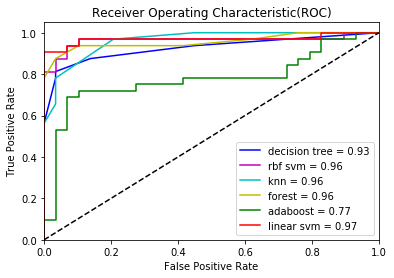

In [174]:
from sklearn.metrics import roc_curve, auc

# decision model
fpr_decision, tpr_decision, thres = roc_curve(y_test,y_predprob_po_decision)
roc_auc_decision = auc(fpr_decision, tpr_decision)

# linear svm model
fpr_linear, tpr_linear, thres = roc_curve(y_test, y_predprob_po_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

# rbf svm model
fpr_rbf, tpr_rbf, thres = roc_curve(y_test, y_predprob_po_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

# knn  model
fpr_knn, tpr_knn, thres = roc_curve(y_test, y_predprob_po_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# random forest model
fpr_forest, tpr_forest, thres = roc_curve(y_test, y_predprob_po_forest)
roc_auc_forest = auc(fpr_forest, tpr_forest)

# adaboost #J:助教前面忘記做Adaboost了，這邊補做一下
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=100)
ada.fit(X_train_std, y_train)
y_predprob_ada = ada.predict_proba(X_test_std)
y_predprob_po_ada =  y_predprob_ada[:,1]
fpr_ada, tpr_ada, thres = roc_curve(y_test, y_predprob_po_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)


# 開始畫圖囉
plt.title('Receiver Operating Characteristic(ROC)')
plt.plot(fpr_decision, tpr_decision, 'b', label='decision tree = %0.2f'% roc_auc_decision)
plt.plot(fpr_rbf, tpr_rbf, 'm', label='rbf svm = %0.2f'% roc_auc_rbf)
plt.plot(fpr_knn, tpr_knn, 'c', label='knn = %0.2f'% roc_auc_knn)
plt.plot(fpr_forest, tpr_forest, 'y', label='forest = %0.2f'% roc_auc_forest)
plt.plot(fpr_ada, tpr_ada, 'g', label='adaboost = %0.2f'% roc_auc_ada)
plt.plot(fpr_linear, tpr_linear, 'r', label='linear svm = %0.2f'% roc_auc_linear)

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], color='k', linestyle='--')  #J:不懂這邊重複2次[0,1]的意思
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])  
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')  
plt.show()

### Sklearn Pipeline (J:看不太懂...)

In [175]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

#load data
df = pd.read_csv('cleveland.dat', header=None, sep=', ', engine='python')
df.columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
              "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
for i in range(1,5):
    df['num'] = df['num'].replace(i,1)

#處理異常值
df = df.replace('?', np.nan)

#資料切割
X = df.drop('num', axis=1).values
y = df['num'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#類別型特徵列表
catego_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
catego_features_index = []
for str in catego_features:
    catego_features_index.append(df.columns.tolist().index(str))

#PIPELINE setting and training
pipe = Pipeline([('imr', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
                ('ohe', OneHotEncoder(categorical_features=catego_features_index, sparse=False)),
                ('scl', StandardScaler()),
                ('clf', SVC(kernel='rbf', random_state=0, C=2.0))])
pipe.fit(X_train, y_train)

#predict
y_pred = pipe.predict(X_test)

print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
# other measurements
precision,recall,fscore,support = precision_recall_fscore_support(y_test, y_pred, average='micro')
print("precision: ", precision)
print("recall: ", recall)
print("fscore: ", fscore)

Misclassified samples: 6
Accuracy: 0.9016
precision:  0.9016393442622951
recall:  0.9016393442622951
fscore:  0.9016393442622952


C:\Users\shawn\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\shawn\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\shawn\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_fea